# OkCupid Date-A-Scientist

## Motivation of the project
In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

In this portfolio project, I will analyze data from OKCupid, an app that focuses on using multiple choice and short answers to match users.

## Scoping

### Project Goals

In this project, the goal is to utilize the skills learned through Codecademy and apply machine learning techniques to a data set. The following questions will be addressed in this study:
1. Can the open answers predict the sex of the user?
2. Can age, height and income predict a user's sex?
3. Can a user's astrological sign be predicted from other features of the user?
4. Bonus: is there a wage difference between the male and female users?

### Data

The project has one data set provided by Codecademy called `profiles.csv`. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

### Analysis

This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. 

### Evaluation

The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall and F1 scores. 

### OkCupid profile data loading

Load profile data into a `DataFrame` called `profiles`.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Users\Ruxi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
profiles = pd.read_csv('profiles.csv')

Display the first rows of `profiles`

In [3]:
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


Display all column names and the data type

In [4]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

Summary of missing points of each feature

In [5]:
profiles.isnull().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

#### Data characteristics

The data has 59946 rows (users) and 31 columns (features).
The data includes:
- 3 numerical continuous features (`age`, `height`, `income`)
- 18 categorical features
- 10 open answer questions (`essay0`-`essay9`).

Display a statistics summary of the numerical continuous features

In [6]:
profiles.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


### Data cleaning
The `income` column includes many -1 values (as shown by the 75% percentile)  

In [7]:
profiles.income.value_counts(dropna=False)

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

Create a new column called `income_clean`, where -1 is replaced by NaN

In [8]:
profiles['income_clean'] = profiles.income.replace(-1, np.nan)
profiles.income_clean.value_counts(dropna=False)

NaN          48442
20000.0       2952
100000.0      1621
80000.0       1111
30000.0       1048
40000.0       1005
50000.0        975
60000.0        736
70000.0        707
150000.0       631
1000000.0      521
250000.0       149
500000.0        48
Name: income_clean, dtype: int64

### Data exploration

#### Continuous features

Plot showing the distibution of `age`, broken down by `sex`

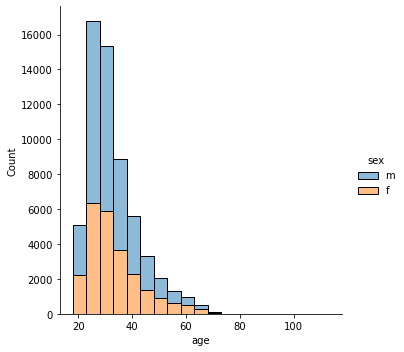

In [9]:
sns.displot(data=profiles, x="age", hue = "sex", kind="hist", binwidth = 5, multiple = "stack", alpha = 0.5);

Plot showing the distibution of `height`, broken down by `sex`

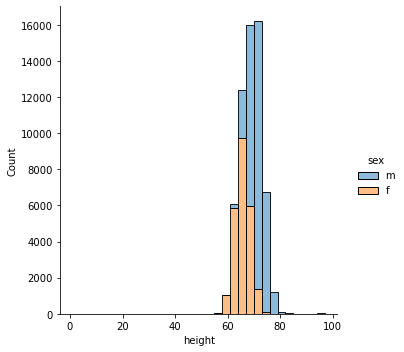

In [10]:
sns.displot(data=profiles, x="height", hue = "sex", kind="hist", binwidth = 3, multiple = "stack", alpha = 0.5);

Plot showing the distibution of `income_clean`, broken down by `sex`

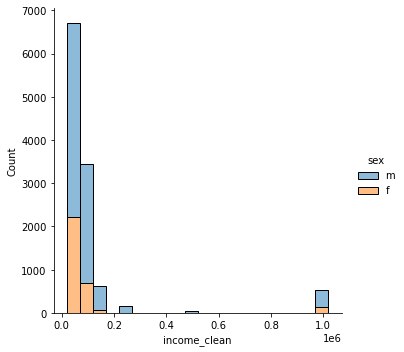

In [11]:
sns.displot(data=profiles, x="income_clean", hue = "sex", kind="hist", binwidth = 50000, multiple = "stack", alpha = 0.5);

**Categorical features**

Plot showing the count of `sex` categories. There are approx. 35k men and 25k women

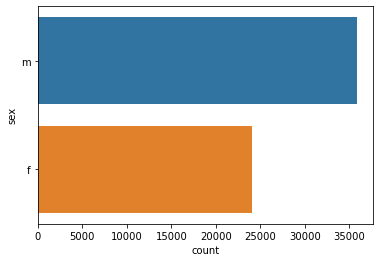

In [12]:
sns.countplot(data=profiles, y="sex");

#### Body type
Plot showing the count of `body_type` categories, broken down by `sex`. Most men consider themselves "average", "athletic" or "fit", while women consider themselves "average", "fit" or "curvy".

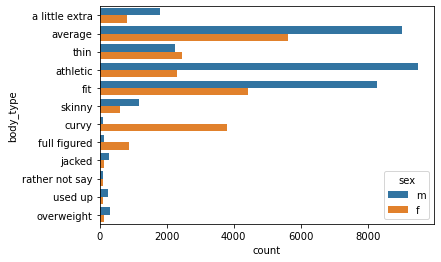

In [13]:
sns.countplot(data=profiles, y="body_type", hue = 'sex');

#### Diet
Plot showing the distribution density of `diet` categories, broken down by `sex`. More women are (mostly/strictly) vegetarian or (mostly/strictly) vegan then men.

<AxesSubplot:xlabel='Density', ylabel='diet'>

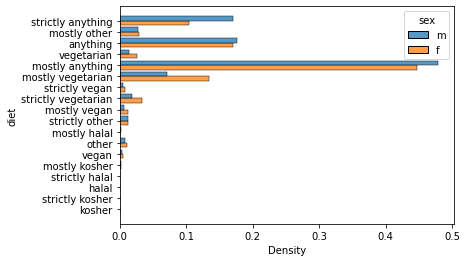

In [14]:
sns.histplot(data = profiles, y = "diet", hue = "sex",  stat = 'density', multiple="dodge",shrink = 0.8, common_norm=False)

#### Drinks
Plot showing the distribution density of `drinks` categories, broken down by `sex`. Most users are social drinkers, with women slightly more often than men.

<AxesSubplot:xlabel='Density', ylabel='drinks'>

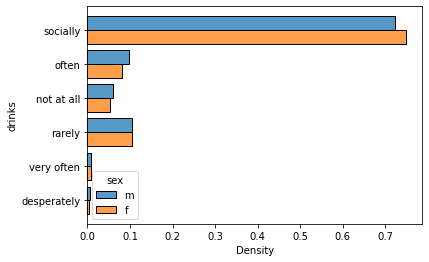

In [15]:
sns.histplot(data = profiles, y = "drinks", hue = "sex",  stat = 'density', multiple="dodge",shrink = 0.8, common_norm=False)

#### Drugs
Plot showing the distribution density of `drugs` categories, broken down by `sex`. Most users, especially women, never used drugs.

<AxesSubplot:xlabel='Density', ylabel='drugs'>

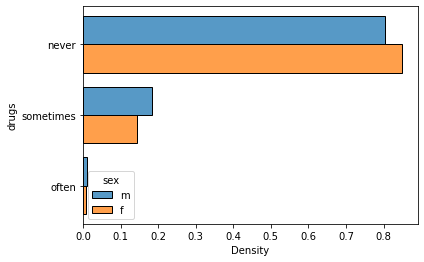

In [16]:
sns.histplot(data = profiles, y = "drugs", hue = "sex",  stat = 'density', multiple="dodge",shrink = 0.8, common_norm=False)

#### Education
Plot showing the distribution density of `education` categories, broken down by `sex`. Almost half of the users are college/university graduates. More women are working on or graduated masters programs than men.

<AxesSubplot:xlabel='Density', ylabel='education'>

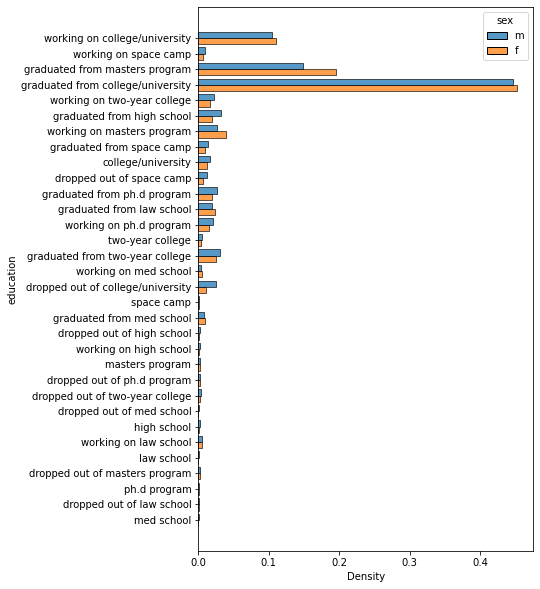

In [17]:
plt.figure(figsize=(6,10))
sns.histplot(data = profiles, y = "education", hue = "sex", stat = 'density', multiple="dodge",shrink = 0.8, common_norm=False)

#### Jobs
Plot showing the distribution density of `job` categories, broken down by `sex`. More men work in transportation, IT, science/tech/engineering than women. More women work in medicine/health, education/academia and clerical/administrative field than men.

<AxesSubplot:xlabel='Density', ylabel='job'>

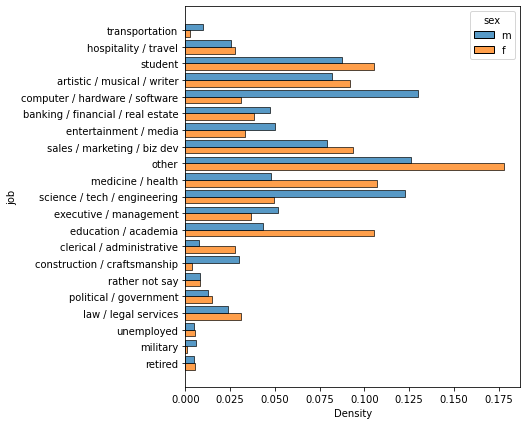

In [18]:
plt.figure(figsize=(6,7))
sns.histplot(data = profiles, y = "job", hue = "sex", stat = 'density', multiple="dodge",shrink = 0.8, common_norm=False)

#### Offsrpings
Plot showing the distribution density of `offsprings` categories, broken down by `sex`. More users don't have children, especially men.

<AxesSubplot:xlabel='Density', ylabel='offspring'>

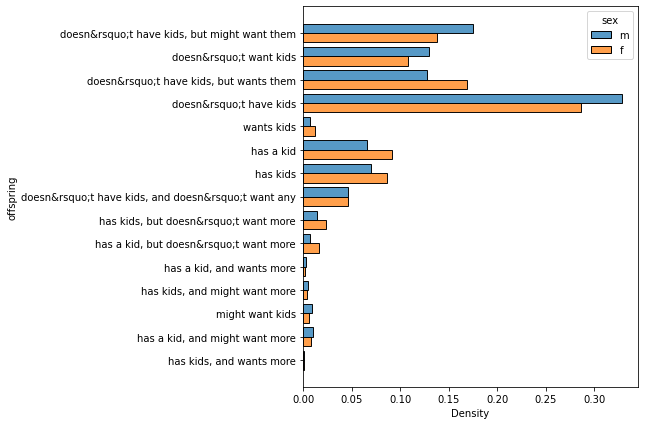

In [19]:
plt.figure(figsize=(6,7))
sns.histplot(data = profiles, y = "offspring", hue = "sex", stat = 'density', multiple="dodge",shrink = 0.8, common_norm=False)

#### Orientation
Plot showing the distribution density of `orientation` categories, broken down by `sex`. Most users are straight, almost equal percentages between men and women. More women are bisexual than men.

<AxesSubplot:xlabel='Density', ylabel='orientation'>

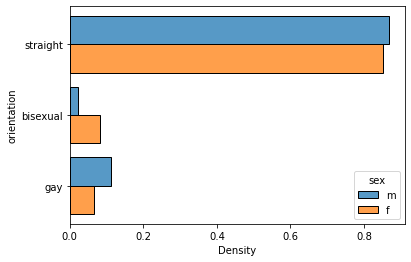

In [20]:
sns.histplot(data = profiles, y = "orientation", hue = "sex", stat = 'density', multiple="dodge",shrink = 0.8, common_norm=False)

#### Pets
Plot showing the distribution density of `pets` categories, broken down by `sex`. More women have pets than men.

<AxesSubplot:xlabel='Density', ylabel='pets'>

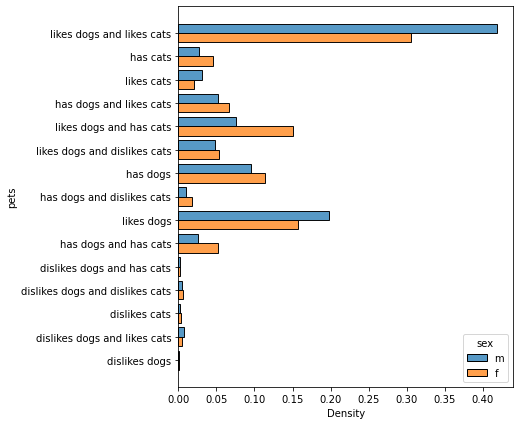

In [21]:
plt.figure(figsize=(6,7))
sns.histplot(data = profiles, y = "pets", hue = "sex", stat = 'density', multiple="dodge",shrink = 0.8, common_norm=False)

Plot showing the the fraction of pet owners, broken down by `sex`. More women are pet owners than men.

<AxesSubplot:xlabel='Density', ylabel='has_pets'>

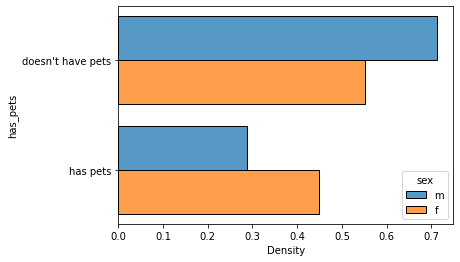

In [22]:
profiles['has_pets'] = profiles.pets.str.contains('has').map({True: "has pets", False: "doesn't have pets"})
sns.histplot(data = profiles, y = "has_pets", hue = "sex", stat = 'density', multiple="dodge",shrink = 0.8, common_norm=False)

#### Religion
Plot showing the user count of `religion` categories.

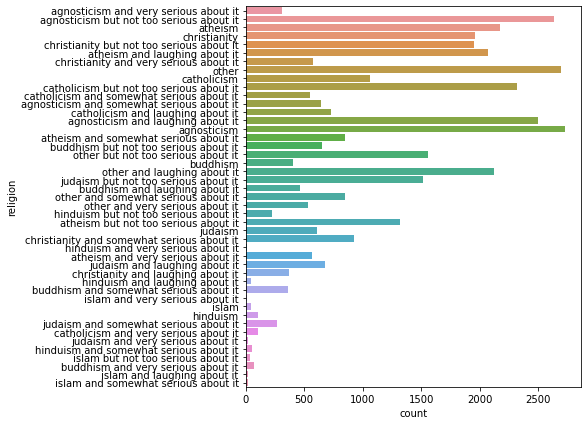

In [23]:
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="religion");

Data cleaned to show only the main categories of religion, broken down by `sex`. More men are agnostic or atheist than women.

<AxesSubplot:xlabel='Density', ylabel='religion_clean'>

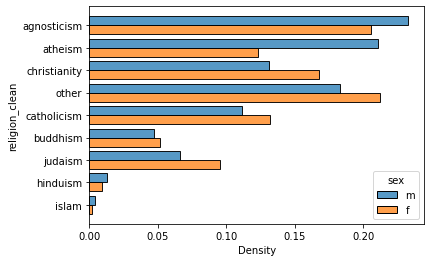

In [24]:
profiles['religion_clean'] = profiles.religion.str.split().str.get(0)
sns.histplot(data = profiles, y = "religion_clean", hue = "sex", stat = 'density', multiple="dodge",shrink = 0.8, common_norm=False)

#### Astrological signs

List showing the categories of `signs`. Each `sign` has 4 subcategories.

In [25]:
print("number of categories:", profiles.sign.nunique())
print("categories:", profiles.sign.unique())

number of categories: 48
categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpi

Data cleaned to show only the main categories of signs.

In [26]:
profiles['sign_clean'] = profiles.sign.str.split().str.get(0)
print("number of categories:",profiles.sign_clean.nunique())
print("categories:", profiles.sign_clean.unique())

number of categories: 12
categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


The most represented sign is leo and the least represented is capricorn.

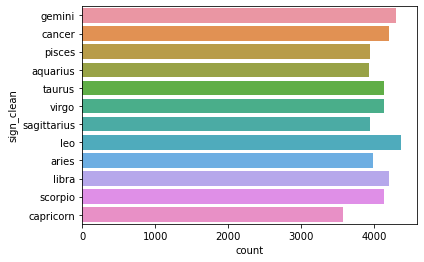

In [27]:
sns.countplot(data=profiles, y="sign_clean");

#### Smoking
Plot showing the distribution density of `smokes` categories, broken down by `sex`. The majority of users are not smokers. Slightly less women are smokers in comparison to men.

<AxesSubplot:xlabel='Density', ylabel='smokes'>

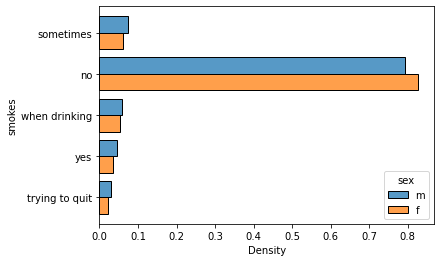

In [28]:
sns.histplot(data = profiles, y = "smokes", hue = "sex", stat = 'density', multiple="dodge",shrink = 0.8, common_norm=False)

#### Status
Plot showing the distribution density of `status` categories, broken down by `sex`. The majority of users are single.

<AxesSubplot:xlabel='Density', ylabel='status'>

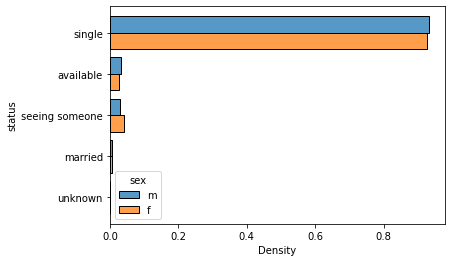

In [29]:
sns.histplot(data = profiles, y = "status", hue = "sex", stat = 'density', multiple="dodge",shrink = 0.8, common_norm=False)

## Data preparation
Check how many values are missing from each feature

In [30]:
profiles.isnull().sum()

age                   0
body_type          5296
diet              24395
drinks             2985
drugs             14080
education          6628
essay0             5488
essay1             7572
essay2             9638
essay3            11476
essay4            10537
essay5            10850
essay6            13771
essay7            12451
essay8            19225
essay9            12603
ethnicity          5680
height                3
income                0
job                8198
last_online           0
location              0
offspring         35561
orientation           0
pets              19921
religion          20226
sex                   0
sign              11056
smokes             5512
speaks               50
status                0
income_clean      48442
has_pets          19921
religion_clean    20226
sign_clean        11056
dtype: int64

## Data analysis

Import all the necessary libraries

In [31]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

### Q1: Can the open answers predict the sex of the user?

#### First, only let's see if the sex can be predicted only from `essay0`

In [32]:
features = ['essay0']
prof = profiles[features + ['sex']].dropna()

X = prof.iloc[:, 0]
Y = prof.iloc[:, 1]

prof.head()

,essay0,sex
0,about me:<br />\n<br />\ni would love to think...,m
1,i am a chef: this is what that means.<br />\n1...,m
2,"i'm not ashamed of much, but writing public te...",m
3,i work in a library and go to school. . .,m
4,hey how's it going? currently vague on the pro...,m


Let's see an example of open answer.

In [33]:
prof.essay0[6]

"life is about the little things. i love to laugh. it's easy to do\nwhen one can find beauty and humor in the ugly. this perspective\nmakes for a more gratifying life. it's a gift. we are here to play."

Split data into train data set (80%) and test data set (20%)

In [34]:
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size = 0.2, random_state = 1)
print('Data points in train data: {}'.format(len(train_data)))
print('Data points in test data: {}'.format(len(test_data)))

Data points in train data: 43566
Data points in test data: 10892


Create a `CountVectorizer` object, fit it on the train data set and vectorize both train and test data sets 

In [35]:
counter_0 = CountVectorizer()
train_vectors = counter_0.fit_transform(train_data)
test_vectors = counter_0.transform(test_data)

Create a Naive Bayes classifier and fit in on the vectorized train data set

In [36]:
classifier_0 = MultinomialNB()
classifier_0.fit(train_vectors, train_labels)
print('Score of the train data set: {:0.3f}'.format(classifier_0.score(train_vectors, train_labels)))
print('Score of the test data set: {:0.3f}'.format(classifier_0.score(test_vectors, test_labels)))

Score of the train data set: 0.795
Score of the test data set: 0.710


The classifier does a relatively good job, by predicting with 70-80% accuracy. Now let's test if sample messages would be classified as coming from a woman or a men

In [37]:
sample_data = pd.Series(["I am strong and independent", "I am a teacher", "I am tall and chilled", "I am an engineer"])
sample_vectors = counter_0.transform(sample_data)

sample_pred = classifier_0.predict(sample_vectors)
for i in range(len(sample_data)):
    print(sample_data[i], ': ',sample_pred[i])

I am strong and independent :  f
I am a teacher :  f
I am tall and chilled :  m
I am an engineer :  m


Next, the following scores are assesed for the train data set and then for the test data set:
- Accuracy = (TP + TN) / (TP + TN + FP + FN)
- Recall = TP / (TP + FN)
- Precision = TP / (TP + FP)
- F1-score = (2 * Recall * Precision) / (Recall + Precision)

TP = true positive, TN = true negative, FP = false positive, FN = false negative

In [38]:
predictions = classifier_0.predict(train_vectors)
print('Train data set: ')
print(classification_report(train_labels, predictions))

Train data set: 
              precision    recall  f1-score   support

           f       0.74      0.76      0.75     17393
           m       0.84      0.82      0.83     26173

    accuracy                           0.80     43566
   macro avg       0.79      0.79      0.79     43566
weighted avg       0.80      0.80      0.80     43566



In [39]:
predictions = classifier_0.predict(test_vectors)
print('Test data set: ')
print(classification_report(test_labels, predictions))

Test data set: 
              precision    recall  f1-score   support

           f       0.64      0.64      0.64      4417
           m       0.75      0.76      0.76      6475

    accuracy                           0.71     10892
   macro avg       0.70      0.70      0.70     10892
weighted avg       0.71      0.71      0.71     10892



This classifier using the first essays had 64% precision in identifying female users and 75% accuracy for male users.

Now let's create a confusion matrix.

In [40]:
labels = classifier_0.classes_
labels_cm = confusion_matrix(test_labels, predictions, normalize = 'true')

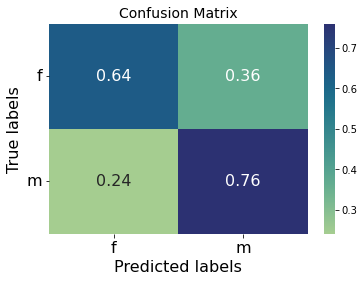

In [41]:
fs = 16

plt.figure()
ax= plt.subplot()
plt.subplots_adjust(bottom=0.15, left = 0.15)
sns.heatmap(labels_cm, annot=True, ax = ax, cmap ='crest', annot_kws={"size": fs});

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize = fs);
ax.set_ylabel('True labels', fontsize = fs); 
ax.set_title('Confusion Matrix', fontsize = 14);
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=0)

ax.xaxis.set_ticklabels(labels, fontsize = fs); 
ax.yaxis.set_ticklabels(labels, fontsize = fs);
plt.savefig("Q1_cm_0.png")

#### Let's investigate how well each of the 10 essays predict the sex of the user.

In [42]:
scores = []
label_feat = 'sex'
for i in range(10):
    feature = 'essay' + str(i)
    prof = profiles[[feature, label_feat]].dropna()

    X = prof.iloc[:,0]
    Y = prof.iloc[:,1]
    
    train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size = 0.2, random_state = 1)
    
    counter_all = CountVectorizer()
    train_vectors = counter_all.fit_transform(train_data)
    test_vectors = counter_all.transform(test_data)
    
    classifier_all = MultinomialNB()
    classifier_all.fit(train_vectors, train_labels)
    
    scores.append(classifier_all.score(test_vectors, test_labels))
    #predictions = classifier_all.predict(test_vectors)
    #print(pd.crosstab(test_labels, predictions, rownames = ['known'], colnames = ['predicted'], normalize = 'index'))
    #print(classification_report(test_labels, predictions))

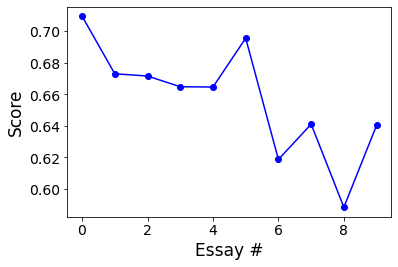

In [43]:
fs = 17
plt.figure(figsize = (6,4))
plt.subplots_adjust(bottom=0.15, left = 0.15)
ax= plt.subplot()
plt.plot(range(10), scores, 'bo-')
plt.xlabel('Essay #', fontsize = fs)
plt.ylabel('Score', fontsize = fs)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.show()
plt.savefig("Score_essay.png")

The scores indicate that the first essay (#0) predicts the best the sex of a user.

#### Next, let's try a classifier gathering data from all essays is used to predict user's sex.

In [44]:
features = []

no_features = 10
for i in range(no_features):
    feature = 'essay' + str(i)
    features.append(feature)

label_feat = 'sex'   
prof = profiles[features + [label_feat]].dropna()
prof['new_feat'] =  ''

for feature in features:
    prof['new_feat'] = prof['new_feat'] + profiles[feature]
    
X = prof.iloc[:,no_features + 1]
Y = prof.iloc[:,no_features]
    
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size = 0.2, random_state = 1)
    
counter_comb = CountVectorizer()
train_vectors = counter_comb.fit_transform(train_data)
test_vectors = counter_comb.transform(test_data)
   
classifier_comb = MultinomialNB()
classifier_comb.fit(train_vectors, train_labels)
predictions = classifier_comb.predict(test_vectors)
print('Score of a model using all {} essays: {:0.3f}'.format(no_features, classifier_comb.score(test_vectors, test_labels)))

Score of a model using all 10 essays: 0.732


This classifier using all essays obtained a 73% accuracy on the test data set, better than any single essay, but at the expense of time. 

Now let's create a confusion matrix.

In [45]:
labels = classifier_comb.classes_
labels_cm = confusion_matrix(test_labels, predictions, normalize = 'true')

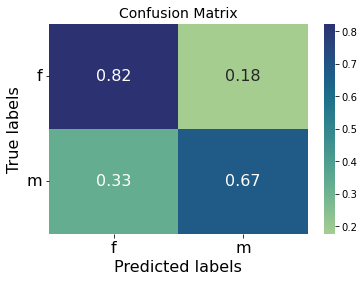

In [46]:
fs = 16

plt.figure()

ax= plt.subplot()
plt.subplots_adjust(bottom=0.15, left = 0.15)
sns.heatmap(labels_cm, annot=True, ax = ax, cmap ='crest', annot_kws={"size": fs});

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize = fs);
ax.set_ylabel('True labels', fontsize = fs); 
ax.set_title('Confusion Matrix', fontsize = 14);
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=0)

ax.xaxis.set_ticklabels(labels, fontsize = fs); 
ax.yaxis.set_ticklabels(labels, fontsize = fs);

plt.savefig("Q1_cm_comb.png")

This model predicted more precisely female users (82%) than male users (67%), in contrast to the model considering only the first essay.

### Q2: Can age, height and income predict a user's sex?

Here, we are focusing on the 3 continuous variables: `age`, `height` and `income`

In [47]:
prof_cont = profiles[['age', 'height', 'income', 'sex']].dropna()
prof_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59943 entries, 0 to 59945
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     59943 non-null  int64  
 1   height  59943 non-null  float64
 2   income  59943 non-null  int64  
 3   sex     59943 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 2.3+ MB


Plot of pairwise relationships of the dataset. This shows which features provide more information about the different classes (sexes). In this case, `height` seems to have a better separation between classes.

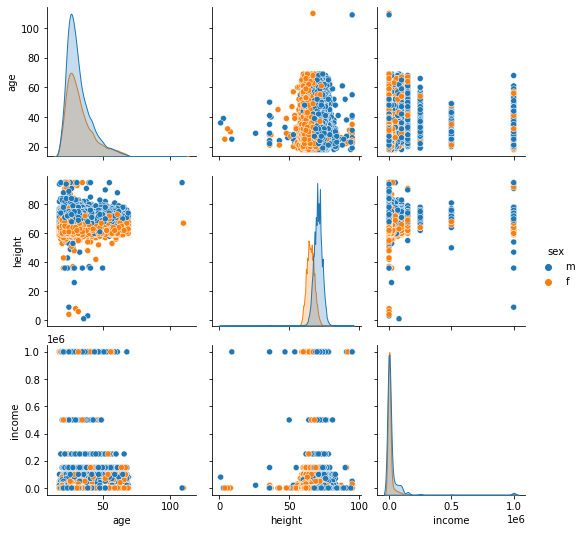

In [48]:
sns.pairplot(prof_cont, hue = 'sex')

Next the data is split into train and validation sets. In this split 80% of the data is kept for training the model, while 20% of the data is reserved for the final validation. 

In [49]:
df= prof_cont
#Y is the target column, X has the rest
X = df.iloc[:, 0:-1]
Y = df.iloc[:, 3:4]

#Validation chunk size
val_size = 0.2

#Split the data into train set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=val_size, random_state = 0)

In [50]:
print('Length data set for training: ', len(X_train))
print('Length data set for testing: ', len(X_test))

Length data set for training:  47954
Length data set for testing:  11989


#### Logistic regression model

Train and test a `LogisticRegression` model to predict the astological sign from other features.
- Accuracy = (TP + TN) / (TP + TN + FP + FN)
- Recall = TP / (TP + FN)
- Precision = TP / (TP + FP)
- F1-score = (2 * Recall * Precision) / (Recall + Precision)

In [51]:
lr_model = LogisticRegression(multi_class="ovr").fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

In [52]:
print('Score of the train data set: {:0.3f}'.format(lr_model.score(X_train, Y_train)))
print('Score of the test data set: {:0.3f}'.format(lr_model.score(X_test, Y_test)))

Score of the train data set: 0.611
Score of the test data set: 0.615


For the 2 categories, the "chance" level of correctly predicting a category is 50%. That means, an accuracy, precision and recall around 60% is only a bit better than the "chance" level.

In [53]:
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

           f       0.57      0.15      0.24     19344
           m       0.62      0.92      0.74     28610

    accuracy                           0.61     47954
   macro avg       0.59      0.54      0.49     47954
weighted avg       0.60      0.61      0.54     47954



In [54]:
lr_predictions = lr_model.predict(X_test)
print(classification_report(Y_test, lr_predictions))

              precision    recall  f1-score   support

           f       0.56      0.15      0.23      4772
           m       0.62      0.92      0.74      7217

    accuracy                           0.62     11989
   macro avg       0.59      0.54      0.49     11989
weighted avg       0.60      0.62      0.54     11989



Create a list to store the scores

In [55]:
cls_dict = classification_report(Y_test, lr_predictions, output_dict = True)
cls_dict_lr = [cls_dict['accuracy'], cls_dict['weighted avg']['precision'], cls_dict['weighted avg']['recall'], cls_dict['weighted avg']['f1-score']]

#### K-Nearest Neighbor

Next, we'll try the `KNeighborsClassifier` which will first use the default value for `n_neighbors = 5` to predict the sexes. 

In [56]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)
print('Score of the train data set: {:0.3f}'.format(knn_model.score(X_train, Y_train)))
print('Score of the test data set: {:0.3f}'.format(knn_model.score(X_test, Y_test)))

Score of the train data set: 0.817
Score of the test data set: 0.800


In [57]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

           f       0.78      0.76      0.77     19344
           m       0.84      0.86      0.85     28610

    accuracy                           0.82     47954
   macro avg       0.81      0.81      0.81     47954
weighted avg       0.82      0.82      0.82     47954



In [58]:
knn_predictions = knn_model.predict(X_test)
print(classification_report(Y_test, knn_predictions))

              precision    recall  f1-score   support

           f       0.75      0.74      0.75      4772
           m       0.83      0.84      0.83      7217

    accuracy                           0.80     11989
   macro avg       0.79      0.79      0.79     11989
weighted avg       0.80      0.80      0.80     11989



With 80% accuracy and 79% precision, this model is performing better.

Create a list to store the scores

In [59]:
cls_dict = classification_report(Y_test, knn_predictions, output_dict = True)
cls_dict_knn = [cls_dict['accuracy'], cls_dict['weighted avg']['precision'], cls_dict['weighted avg']['recall'], cls_dict['weighted avg']['f1-score']]

#### Decision Tree

The next model is the decision tree. The default `max_depth` is `none` which means that it will "If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.". 

In [60]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train) 

In [61]:
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

           f       0.82      0.79      0.81     19344
           m       0.86      0.88      0.87     28610

    accuracy                           0.85     47954
   macro avg       0.84      0.84      0.84     47954
weighted avg       0.85      0.85      0.85     47954



In [62]:
cart_predictions = cart_model.predict(X_test)
print(classification_report(Y_test, cart_predictions))

              precision    recall  f1-score   support

           f       0.79      0.76      0.78      4772
           m       0.85      0.86      0.85      7217

    accuracy                           0.82     11989
   macro avg       0.82      0.81      0.81     11989
weighted avg       0.82      0.82      0.82     11989



With 82% accuracy, this model is performing the best among the three models

Create a list to store the scores

In [63]:
cls_dict = classification_report(Y_test, cart_predictions, output_dict = True)
cls_dict_dt = [cls_dict['accuracy'], cls_dict['weighted avg']['precision'], cls_dict['weighted avg']['recall'], cls_dict['weighted avg']['f1-score']]

Confusion matrix showing the results with the true values on the y axis and predicted values along the x axis. 

In [64]:
cart_cm = confusion_matrix(Y_test, cart_predictions)
cart_labels = cart_model.classes_

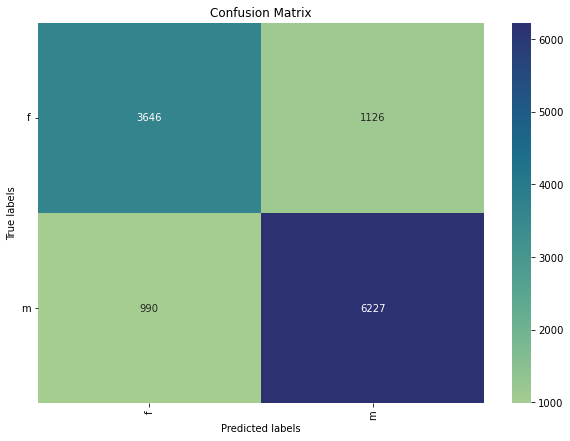

In [65]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d", cmap = 'crest');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

In [66]:
cart_model.get_depth()

22

This decision tree model has a depth of 22 branches

How well did the models perform compared to each other?
The next plot shows that the KNN and Decision tree models performed the best.

In [67]:
cls = [cls_dict_lr, cls_dict_knn, cls_dict_dt]
cls_models = ['Logistic\n Regression', 'K-Nearest\n Neighbor', 'Decision\n Tree']
cls_scores = ['Accuracy', 'Precision', 'Recall', 'F1-score']

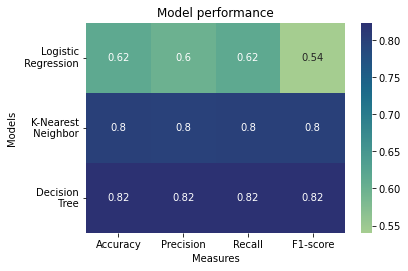

In [68]:
plt.figure(figsize=(6,4))
plt.subplots_adjust(bottom=0.15, left = 0.15)
ax= plt.subplot()

sns.heatmap(cls, annot=True, ax = ax, fmt=".2g", cmap = 'crest');

# labels, title and ticks
ax.set_xlabel('Measures');
ax.set_ylabel('Models'); 
ax.set_title('Model performance');
ax.yaxis.set_tick_params(rotation=360)
#ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cls_scores); 
ax.yaxis.set_ticklabels(cls_models);
plt.savefig("models_scores.png")

### Q3: Can a user's astrological sign be predicted from other features of the user?
A subset of the data is created, with feature which could possibly predict the astrological sign. All rows (users) which don't have an entry to at least one feature will be dropped.

In [69]:
cols = ['body_type', 'diet', 'drinks', 'drugs','smokes', 'orientation', 'has_pets', 'religion_clean',
       'sex', 'job', 'sign_clean']
df = profiles[cols].dropna()
df.shape

(12927, 11)

Our data set contain 12927 users and 11 features.

In [70]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [71]:
df.head()

,sign_clean,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,body_type_skinny,body_type_thin,body_type_used up,diet_anything,diet_halal,diet_kosher,diet_mostly anything,diet_mostly halal,diet_mostly kosher,diet_mostly other,diet_mostly vegan,diet_mostly vegetarian,diet_other,diet_strictly anything,diet_strictly halal,diet_strictly kosher,diet_strictly other,diet_strictly vegan,diet_strictly vegetarian,diet_vegan,diet_vegetarian,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,drugs_never,drugs_often,drugs_sometimes,smokes_no,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes,orientation_bisexual,orientation_gay,orientation_straight,has_pets_doesn't have pets,has_pets_has pets,religion_clean_agnosticism,religion_clean_atheism,religion_clean_buddhism,religion_clean_catholicism,religion_clean_christianity,religion_clean_hinduism,religion_clean_islam,religion_clean_judaism,religion_clean_other,sex_f,sex_m,job_artistic / musical / writer,job_banking / financial / real estate,job_clerical / administrative,job_computer / hardware / software,job_construction / craftsmanship,job_education / academia,job_entertainment / media,job_executive / management,job_hospitality / travel,job_law / legal services,job_medicine / health,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11,leo,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Next the data is split into train and validation sets. In this split 80% of the data is kept for training the model, while 20% of the data is reserved for the final validation. 

In [72]:
col_length = len(df.columns)

#Y is the target column, X has the rest
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

#Validation chunk size
val_size = 0.2

#Split the data into train set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=val_size, random_state = 0)

In [73]:
print('Length data set for training: ', len(X_train))
print('Length data set for testing: ', len(X_test))

Length data set for training:  10341
Length data set for testing:  2586


#### Logistic regression model

Train and test a `LogisticRegression` model to predict the astological sign from other features.
- Accuracy = (TP + TN) / (TP + TN + FP + FN)
- Recall = TP / (TP + FN)
- Precision = TP / (TP + FP)
- F1-score = (2 * Recall * Precision) / (Recall + Precision)

In [74]:
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)


In [75]:
print('Score of the train data set: {:0.3f}'.format(lr_model.score(X_train, Y_train)))
print('Score of the test data set: {:0.3f}'.format(lr_model.score(X_test, Y_test)))

Score of the train data set: 0.126
Score of the test data set: 0.082


For 12 categories, the "chance" level of correctly predicting a category is 8%. That means, an accuracy, precision and recall of 12% is a poor result. For the test data set, the score of 0.08 represents the "chance" level.

In [76]:
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.11      0.06      0.07       805
       aries       0.12      0.12      0.12       839
      cancer       0.14      0.16      0.15       902
   capricorn       0.13      0.07      0.09       785
      gemini       0.12      0.14      0.13       932
         leo       0.14      0.19      0.17       910
       libra       0.11      0.13      0.12       871
      pisces       0.13      0.16      0.14       858
 sagittarius       0.15      0.09      0.11       812
     scorpio       0.13      0.07      0.09       835
      taurus       0.13      0.07      0.09       859
       virgo       0.12      0.22      0.15       933

    accuracy                           0.13     10341
   macro avg       0.13      0.12      0.12     10341
weighted avg       0.13      0.13      0.12     10341



#### K-Nearest Neighbor

Next, we'll try the `KNeighborsClassifier` which will first use the default value for `n_neighbors = 5` to predict the signs. 

In [77]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)
print('Score of the train data set: {:0.3f}'.format(knn_model.score(X_train, Y_train)))
print('Score of the test data set: {:0.3f}'.format(knn_model.score(X_test, Y_test)))

Score of the train data set: 0.337
Score of the test data set: 0.085


In [78]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.25      0.64      0.36       805
       aries       0.28      0.55      0.37       839
      cancer       0.31      0.46      0.37       902
   capricorn       0.33      0.34      0.33       785
      gemini       0.35      0.30      0.33       932
         leo       0.39      0.27      0.32       910
       libra       0.42      0.30      0.35       871
      pisces       0.42      0.28      0.33       858
 sagittarius       0.44      0.23      0.30       812
     scorpio       0.42      0.23      0.30       835
      taurus       0.43      0.23      0.30       859
       virgo       0.42      0.26      0.32       933

    accuracy                           0.34     10341
   macro avg       0.37      0.34      0.33     10341
weighted avg       0.37      0.34      0.33     10341



With a 34% accuracy and 37% precision, this model is performing better.

In [79]:
knn_predictions = knn_model.predict(X_test)
print(classification_report(Y_test, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.08      0.22      0.11       178
       aries       0.10      0.19      0.13       212
      cancer       0.07      0.09      0.08       246
   capricorn       0.04      0.06      0.05       168
      gemini       0.08      0.06      0.07       231
         leo       0.13      0.09      0.11       254
       libra       0.09      0.07      0.08       199
      pisces       0.08      0.06      0.07       181
 sagittarius       0.06      0.03      0.04       224
     scorpio       0.11      0.07      0.08       228
      taurus       0.12      0.05      0.07       234
       virgo       0.11      0.06      0.07       231

    accuracy                           0.09      2586
   macro avg       0.09      0.09      0.08      2586
weighted avg       0.09      0.09      0.08      2586



This model had a better score for the train data set (33%), but still a chance score for the train data set (8%). This shows that the model was overfit for the train data set and it didn't generalize for the test data set.

Let's try different values for `n_neighbors` to predict the signs.

In [80]:
max_n_neighbors = 21
score_train = []
score_test = []
for n in range(1,max_n_neighbors+1,2):
    knn_model = KNeighborsClassifier(n_neighbors = n).fit(X_train, Y_train)
    score_train.append(knn_model.score(X_train, Y_train))
    score_test.append(knn_model.score(X_test, Y_test))

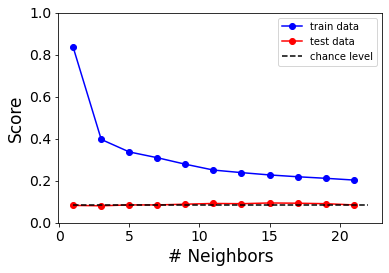

In [81]:
fs = 17
plt.figure(figsize = (6,4))
plt.subplots_adjust(bottom=0.15, left = 0.15)
ax= plt.subplot()
plt.plot(range(1, max_n_neighbors+1, 2), score_train, 'bo-', label = 'train data')
plt.plot(range(1, max_n_neighbors+1, 2), score_test, 'ro-', label = 'test data')
plt.plot([1, max_n_neighbors+1], [1/12, 1/12], 'k--', label = 'chance level')
plt.xlabel('# Neighbors', fontsize = fs)
plt.ylabel('Score', fontsize = fs)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0,1])
plt.legend()
#plt.show()
plt.savefig("Score_knn.png")

We can notice that the prediction score for the train data set is decreasing with the number of nearest neighbors, while the score remains constant below 10% for the test data set.

#### Decision Tree

The next model is the decision tree. The default `max_depth` is `none` which means that it will "If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.". 

In [82]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train) 

In [83]:
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.74      0.94      0.83       805
       aries       0.73      0.93      0.82       839
      cancer       0.79      0.91      0.84       902
   capricorn       0.82      0.89      0.85       785
      gemini       0.81      0.87      0.84       932
         leo       0.84      0.87      0.86       910
       libra       0.86      0.83      0.84       871
      pisces       0.90      0.78      0.84       858
 sagittarius       0.89      0.78      0.83       812
     scorpio       0.96      0.78      0.86       835
      taurus       0.94      0.78      0.86       859
       virgo       0.96      0.76      0.85       933

    accuracy                           0.84     10341
   macro avg       0.85      0.84      0.84     10341
weighted avg       0.86      0.84      0.84     10341



With 84% accuracy, this model is performing the best among the three models

Confusion matrix showing the results with the true values on the y axis and predicted values along the x axis. 

In [84]:
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_

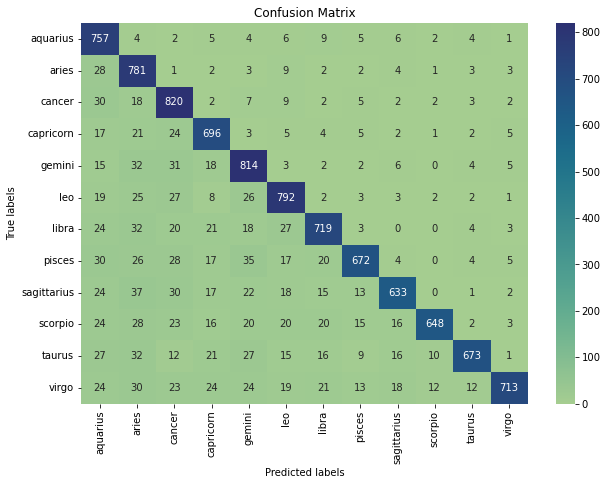

In [85]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d", cmap = 'crest');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

In [86]:
cart_model.get_depth()

60

Going back to the model, a quick analysis will show that this tree model has a depth of 60 branches, which will probably not generalize to another dataset. In this case this model has been "overfit" for this data. 

Next, let's have a look at how the model performs with different `max_depth` values

In [87]:
max_max_depth = 62
step_max_depth = 5
score_train = []
score_test = []
for n in range(1,max_max_depth,step_max_depth):
    cart_model = DecisionTreeClassifier(max_depth = n).fit(X_train, Y_train) 
    score_train.append(cart_model.score(X_train, Y_train))
    score_test.append(cart_model.score(X_test, Y_test))

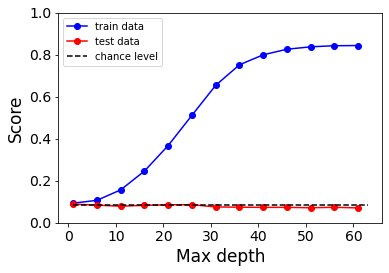

In [88]:
fs = 17
plt.figure(figsize = (6,4))
plt.subplots_adjust(bottom=0.15, left = 0.15)
ax= plt.subplot()
plt.plot(range(1,max_max_depth,step_max_depth), score_train, 'bo-', label = 'train data')
plt.plot(range(1,max_max_depth,step_max_depth), score_test, 'ro-', label = 'test data')
plt.plot([1, max_max_depth+1], [1/12, 1/12], 'k--', label = 'chance level')
plt.xlabel('Max depth', fontsize = fs)
plt.ylabel('Score', fontsize = fs)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0,1])
plt.legend()
#plt.show()
plt.savefig("Score_decTree.png")

The model indeed tends to overfit with a higher `max_depth` and it doesn't generalize for the test data set. 

#### Random forest
This model is similar to the one above. A random forest has many decision trees and it returns their aggregated predictions.

In [89]:
max_estimators = 15
score_train = []
score_test = []
for n in range(1,max_estimators+1):
    classifier = RandomForestClassifier(n_estimators = n, random_state = 0)
    classifier.fit(X_train, Y_train)
    score_train.append(classifier.score(X_train, Y_train))
    score_test.append(classifier.score(X_test, Y_test))

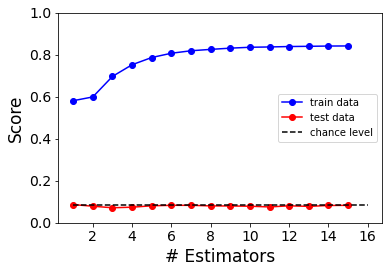

In [90]:
fs = 17
plt.figure(figsize = (6,4))
plt.subplots_adjust(bottom=0.15, left = 0.15)
ax= plt.subplot()
plt.plot(range(1, max_estimators+1), score_train, 'bo-', label = 'train data')
plt.plot(range(1, max_estimators+1), score_test, 'ro-', label = 'test data')
plt.plot([1, max_estimators+1], [1/12, 1/12], 'k--', label = 'chance level')
plt.xlabel('# Estimators', fontsize = fs)
plt.ylabel('Score', fontsize = fs)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0,1])
plt.legend()
#plt.show()
plt.savefig("Score_RandomForest.png")

### Q4 (bonus): Is there a wage difference between the male and female users?

In [91]:
f_income = profiles[profiles.sex == 'f'].income_clean/1000
m_income = profiles[profiles.sex == 'm'].income_clean/1000

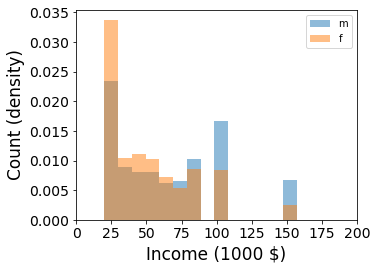

In [92]:
fs = 17
plt.figure(figsize = (6,4))
plt.subplots_adjust(bottom=0.15, left = 0.25)
ax= plt.subplot()

plt.hist(m_income, alpha = 0.5, bins = 100, label = 'm', density = True)
plt.hist(f_income, alpha = 0.5, bins = 100, label = 'f', density = True)
plt.xlim([0,200])
plt.xlabel('Income (1000 $)', fontsize = fs)
plt.ylabel('Count (density)', fontsize = fs)
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.show()
plt.savefig("Income_hist.png")

The plot above shows that a higher proportion of women have low salaries than men.

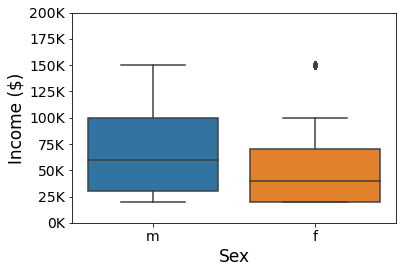

In [93]:
fs = 17
plt.figure(figsize = (6,4))
plt.subplots_adjust(bottom=0.15, left = 0.15)
ax= plt.subplot()

g = sns.boxplot(x = 'sex', y = 'income_clean',data = profiles)
plt.ylim([0,200000])
plt.xlabel('Sex', fontsize = fs)
plt.ylabel('Income ($)', fontsize = fs)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_yticks()/1000]
g.set_yticklabels(ylabels)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.show()
plt.savefig("Income_box.png")


In [94]:
print('Average salary earned by men: ', np.round(profiles[profiles.sex == 'm'].income_clean.mean()), '$')
print('Median salary earned by men: ', np.round(profiles[profiles.sex == 'm'].income_clean.median()), '$')

Average salary earned by men:  110984.0 $
Median salary earned by men:  60000.0 $


In [95]:
print('Average salary earned by women: ', np.round(profiles[profiles.sex == 'f'].income_clean.mean()), '$')
print('Median salary earned by women: ', np.round(profiles[profiles.sex == 'f'].income_clean.median()), '$')

Average salary earned by women:  86633.0 $
Median salary earned by women:  40000.0 $


In [96]:
import scipy.stats as stats
stats.ttest_ind(profiles[profiles['sex'] == 'm']['income'].dropna(),
                profiles[profiles['sex'] == 'f']['income'].dropna())

Ttest_indResult(statistic=18.31604914544086, pvalue=9.864524873650853e-75)

A p-value smaller that 0.05 shows the difference between the average income earned by men vs women is significant.